[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-04-coffee-store-input)

## 소상공인시장진흥공단 상가업소정보로 스타벅스, 이디야 위치 분석하기

* 이디야는 스타벅스 근처에 입점한다는 설이 있습니다. 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 날까요? 관련 기사를 읽고 구별로 이디야와 스타벅스의 매장을 기사와 유사하게 분석하고 시각화 해보면서 Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현해 봅니다..

### 다루는 내용
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기

### 실습
* 텍스트 데이터 정제하기 -  대소문자로 섞여있는 상호명을 소문자로 변경하고 상호명 추출하기
* 텍스트 데이터에서 원하는 정보 추출하기 - 브랜드명 컬럼을 만들고 구별 매장 수 분석하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 choropleth 그리기


### 데이터셋
* https://www.data.go.kr/dataset/15012005/fileData.do
* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)
    * 이 링크에서도 다운로드가 가능합니다. https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5

### 관련기사
* [[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'](http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015)

## 필요한 라이브러리 불러오기

In [4]:
#데이터 분석을 위해 pandas를, 수치 계산을 위해 numpy를, 시각화를 위해 seaborn 부르기
import pandas as pd
import numpy as np
import seaborn as sns
#구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정

In [11]:
#한글폰트 설정
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [13]:
#폰트가 선명하게 보이도록 retina 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트'}>

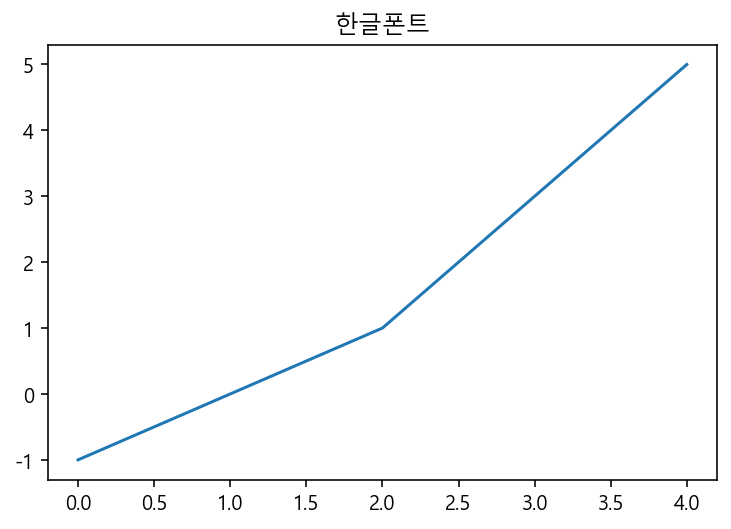

In [14]:
#한글폰트와 마이너스 폰트 설정 확인
pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

## 데이터 불러오기

In [17]:
%ls C:\Users\pmj35\Documents\project

 C 드라이브의 볼륨: Acer
 볼륨 일련 번호: 1CC4-4493

 C:\Users\pmj35\Documents\project 디렉터리

2021-02-11  오후 04:54    <DIR>          .
2021-02-11  오후 04:54    <DIR>          ..
2021-02-11  오전 10:43    <DIR>          .ipynb_checkpoints
2021-01-31  오후 09:21         2,143,772 apartment.ipynb
2021-02-11  오후 04:54            32,385 coffee.ipynb
2021-02-10  오후 06:55         9,687,774 franchise.ipynb
2021-02-10  오후 06:55         1,110,377 heatmap.html
2021-02-10  오후 07:00             3,441 index.html
2021-02-11  오전 10:44    <DIR>          open-data-analysis-basic-master
2021-02-10  오후 06:42         1,085,776 paris-TousLesJours-index.html
2021-02-10  오후 05:48        77,085,147 seoul_open_store.csv
2021-02-10  오후 07:01         5,853,302 store.ipynb
2021-02-01  오후 10:33       264,920,940 상가업소정보_201912_01.csv
2020-12-26  오후 08:50             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2020-12-26  오후 08:50           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
              11개 파일         362,087,587 바이트
        

In [21]:
# 파일 불러와 df 변수에 담기
df=pd.read_csv("상가업소정보_201912_01.csv", sep="|")
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


### 데이터 미리보기

In [23]:
df.shape

(573680, 39)

### info 보기

In [24]:
# info를 사용해서 데이터 사이즈, 타입, 메모리 사용량 등의 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

<AxesSubplot:>

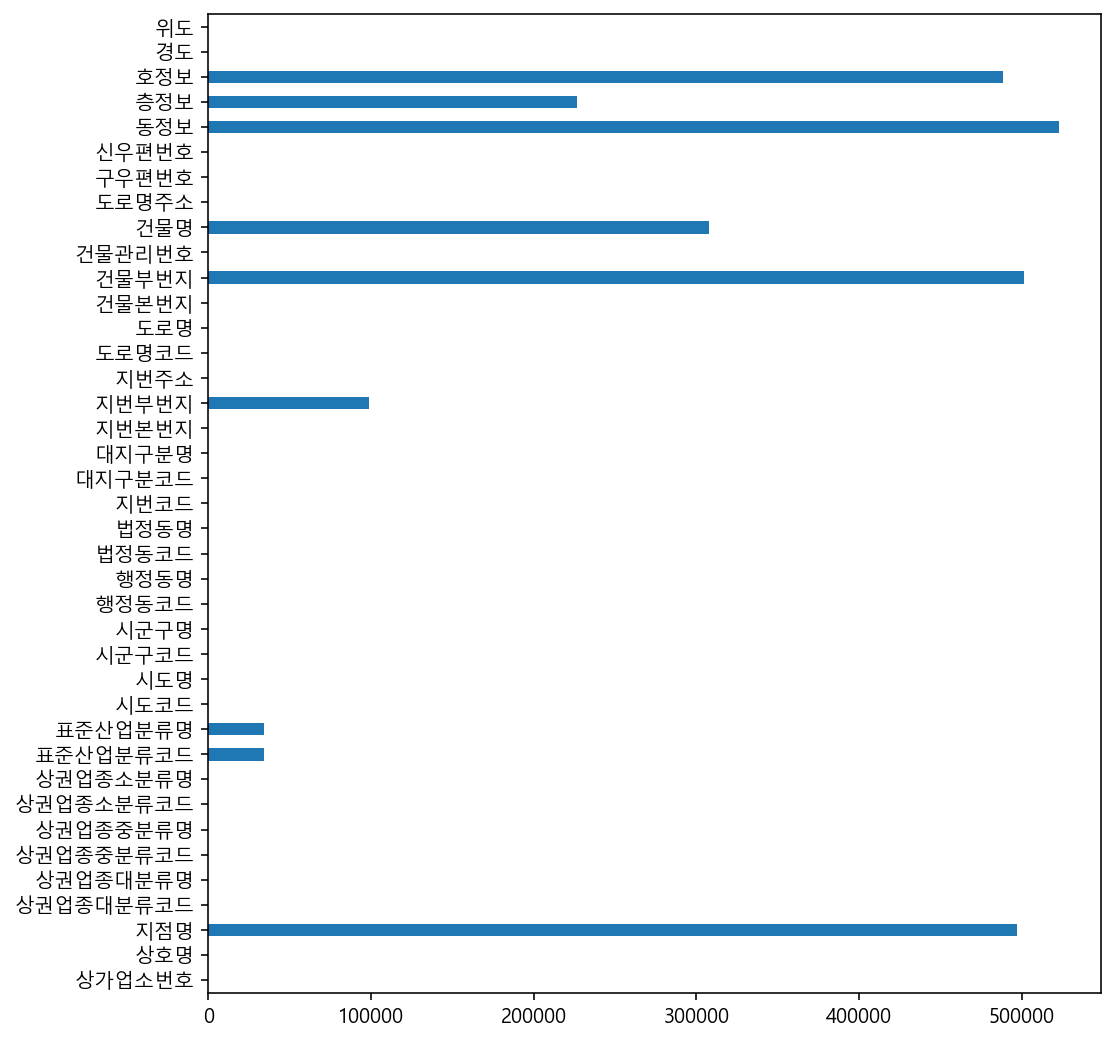

In [29]:
# isnull()을 사용해서 결측치 보기.
# 결측치는 True, 값이 있는 경우는 False로 표시. True는 1이기 때문에
# True값을 sum()하면 결측치 갯수를 알 수 있음.
df.isnull().sum().plot.barh(figsize=(8, 9))

### 사용하지 않는 컬럼 제거

In [30]:
# 사용할 컬럼만 따로 모아보기
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df=df[columns].copy()
df.shape

(573680, 11)

In [31]:
# 컬럼 제거 후 메모리 사용량 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기

### 서울만 따로 보기

In [32]:
# 시도명이 서울로 시작하는 데이터만 보기
# 이를 df_seoul 이라는 변수에 저장
# 새로운 변수에 데이터프레임을 할당할 때, copy()를 사용할 것
df_seoul=df[df["시도명"]=="서울특별시"].copy()

In [33]:
df_seoul.shape

(407376, 11)

### 일부 텍스트가 들어가는 데이터만 가져오기
* 상호명에서 브랜드명 추출
* 대소문자가 섞여 있을 수 있기 때문에 대소문자 변환
* 오타 방지를 위해 스타벅스 영문명은 STARBUCKS, 이디야는 EDIYA라고 지정
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

In [35]:
# 문자열 소문자로 바꾸는 메소드 사용
df_seoul["상호명_소문자"]=df_seoul["상호명"].str.lower()

In [42]:
# "상호명_소문자"컬럼으로 지정하고 '이디아|ediya' 갯수 세기
# .loc[행], .loc[행, 열]
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"),
         "상호명_소문자"].shape

(543,)

In [45]:
# 상호명에서 스타벅스만 가져오기
# 상호명은 소문자로 변경해 준 컬럼을 사용
# 스타벅스|starbucks의 "상호명_소문자"로 갯수 세기

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks"), 
             "상호명_소문자"].shape

(506,)

In [67]:
# "상호명_소문자"컬럼으로 '스타벅스|starbucks"이디야|이디아|ediya'를 가져와서
# df_cafe 변수에 담기
df_cafe=df_seoul[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks|이디야|이디아|ediya")].copy()
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
1104,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,이태원1동,이태원동,서울특별시 용산구 이태원로 188,126.994781,37.534303,스타벅스
1675,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야커피
2023,스타벅스종로3가점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,종로1.2.3.4가동,종로3가,서울특별시 종로구 종로 113-1,126.990207,37.570585,스타벅스종로3가점
2770,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 강남대로 581,127.019763,37.513663,스타벅스
2957,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 43,126.897870,37.484385,이디야커피
...,...,...,...,...,...,...,...,...,...,...,...,...
567090,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,낙성대동,봉천동,서울특별시 관악구 관악로 158,126.952792,37.479298,스타벅스
567828,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,금호4가동,금호동4가,서울특별시 성동구 동호로 99,127.015329,37.548028,스타벅스
568636,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재1동,우면동,서울특별시 서초구 바우뫼로 20,127.025274,37.469980,이디야커피
570096,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서대문구,북아현동,북아현동,서울특별시 서대문구 북아현로 29,126.956144,37.560080,스타벅스


In [71]:
# ~은 not을 의미. 스타벅스가 아닌 데이터는 이디야로 넣을 수 있고
# 스타벅스 이외에 결측치 값에 이디야를 채우는 것도 가능
df_cafe.loc[df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), "브랜드명"]="스타벅스"
df_cafe[["상호명_소문자", "브랜드명"]]

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,NaN
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,NaN
...,...,...
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,NaN
570096,스타벅스,스타벅스


In [72]:
# ~은 not을 의미. 스타벅스가 아닌 데이터는 이디야로 넣을 수 있고
# 스타벅스 이외에 결측치 값에 이디야를 채우는 것도 가능
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), "브랜드명"]="이디야"
df_cafe[["상호명_소문자", "브랜드명"]]

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야
...,...,...
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,이디야
570096,스타벅스,스타벅스


In [75]:
#df_cafe 에 담긴 상호명과 브랜드명 미리보기
df_cafe[["상호명_소문자", "브랜드명"]].tail()

,상호명_소문자,브랜드명
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,이디야
570096,스타벅스,스타벅스
571052,스타벅스,스타벅스


### 시각화

#### 분류별 countplot 그리기

<AxesSubplot:>

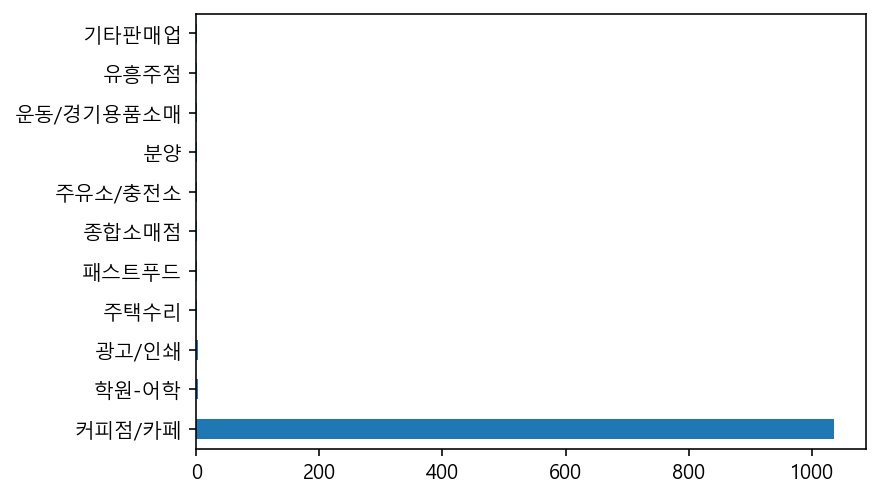

In [78]:
# "상권업종중분류명"을 countplot으로 시각화하고 분류 혹은 데이터가 잘못 색인된 데이터가 있는지 확인
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [84]:
df_cafe=df_cafe[df_cafe["상권업종중분류명"]=="커피점/카페"].copy()
df_cafe["상권업종중분류명"].value_counts()

커피점/카페    1036
Name: 상권업종중분류명, dtype: int64

In [85]:
# 브랜드명으로 카페 갯수 세기
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

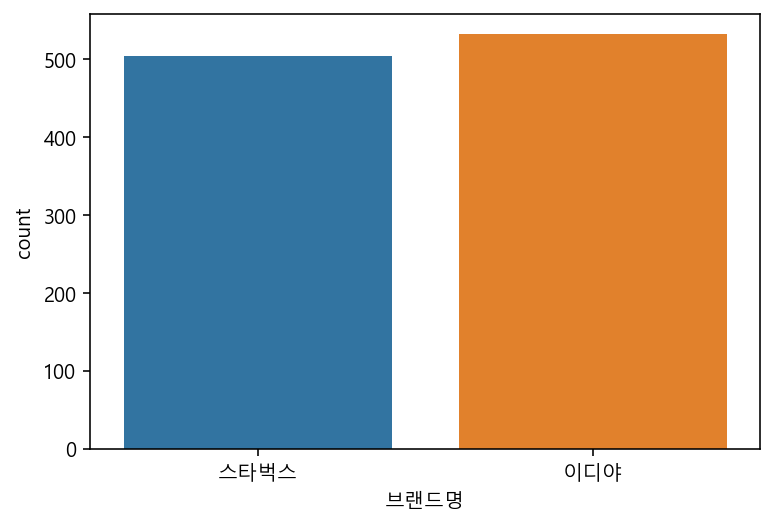

In [86]:
# 브랜드명을 막대그래프로 그리기
sns.countplot(data=df_cafe, x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

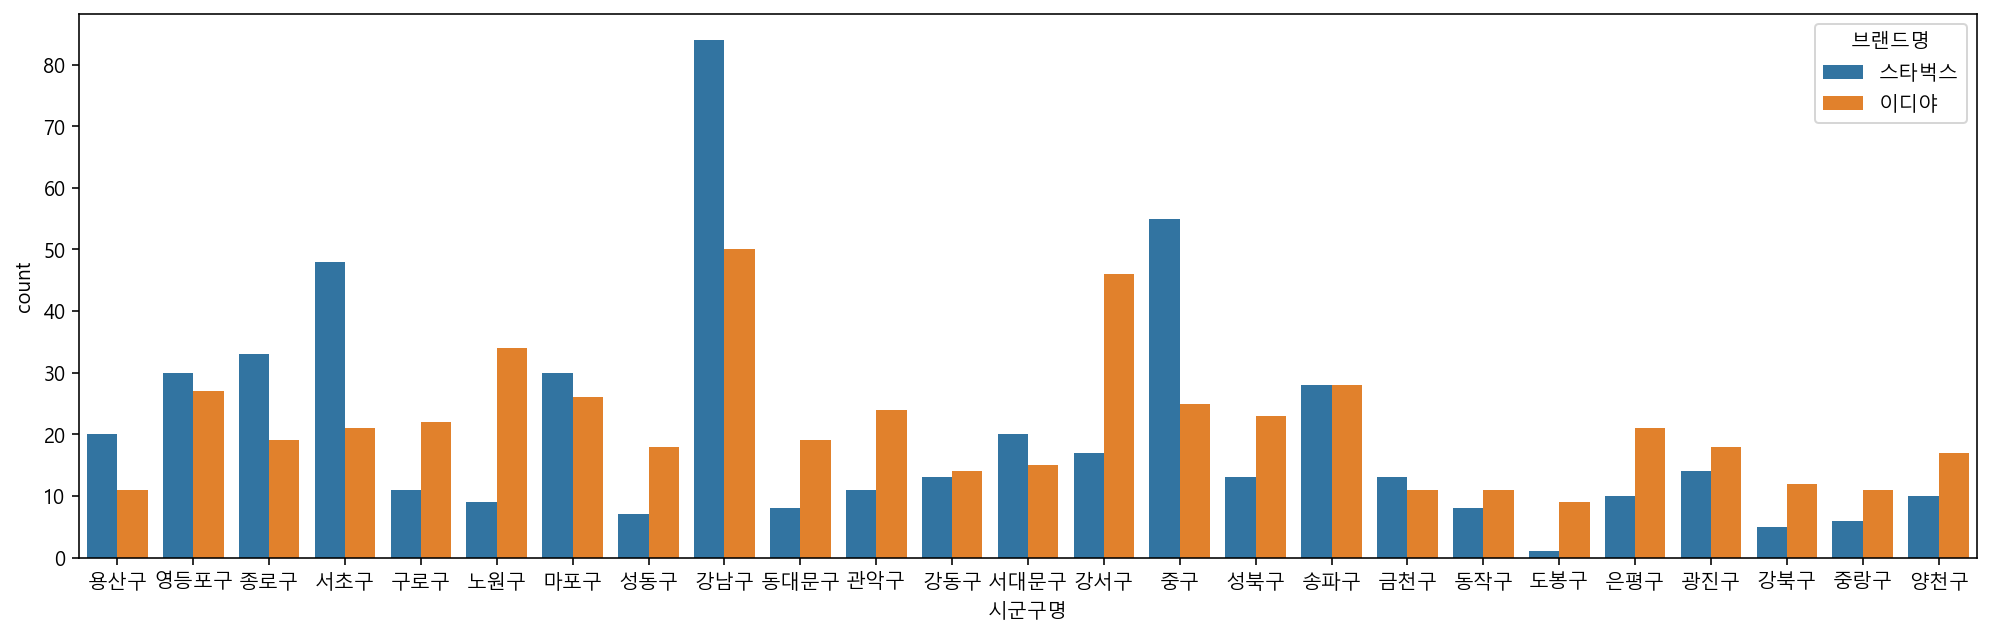

In [88]:
plt.figure(figsize=(17, 5))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

#### scatterplot 그리기
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

<AxesSubplot:xlabel='경도', ylabel='위도'>

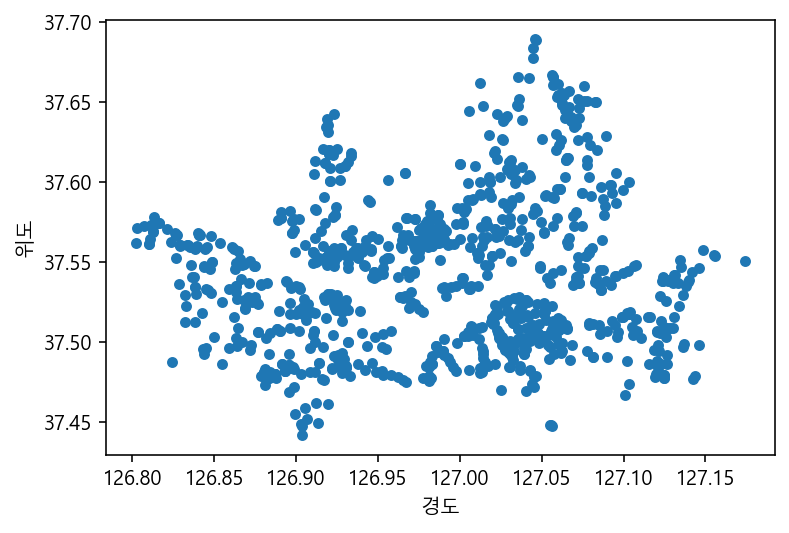

In [93]:
#pandas로 scatterplot 그리기
df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

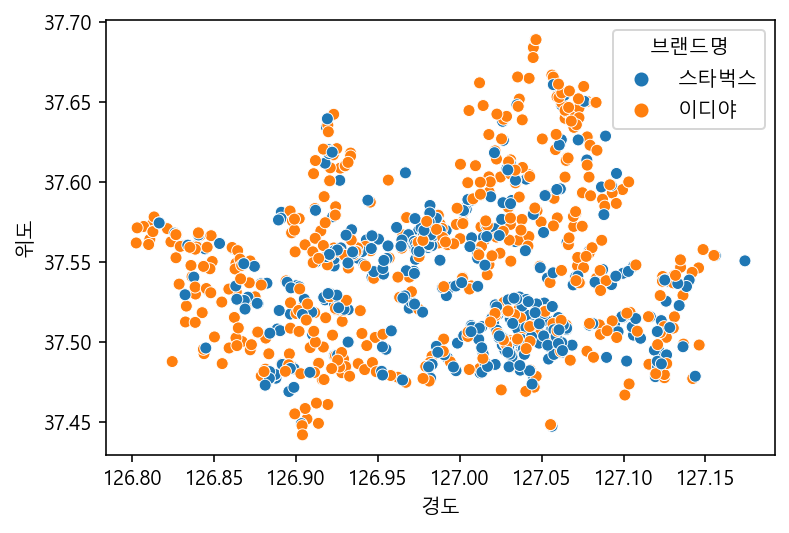

In [94]:
# seaborn의 scatterplot으로 시각화 하기. 단 hue는 브랜드명으로 지정
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

#### jointplot 그리기

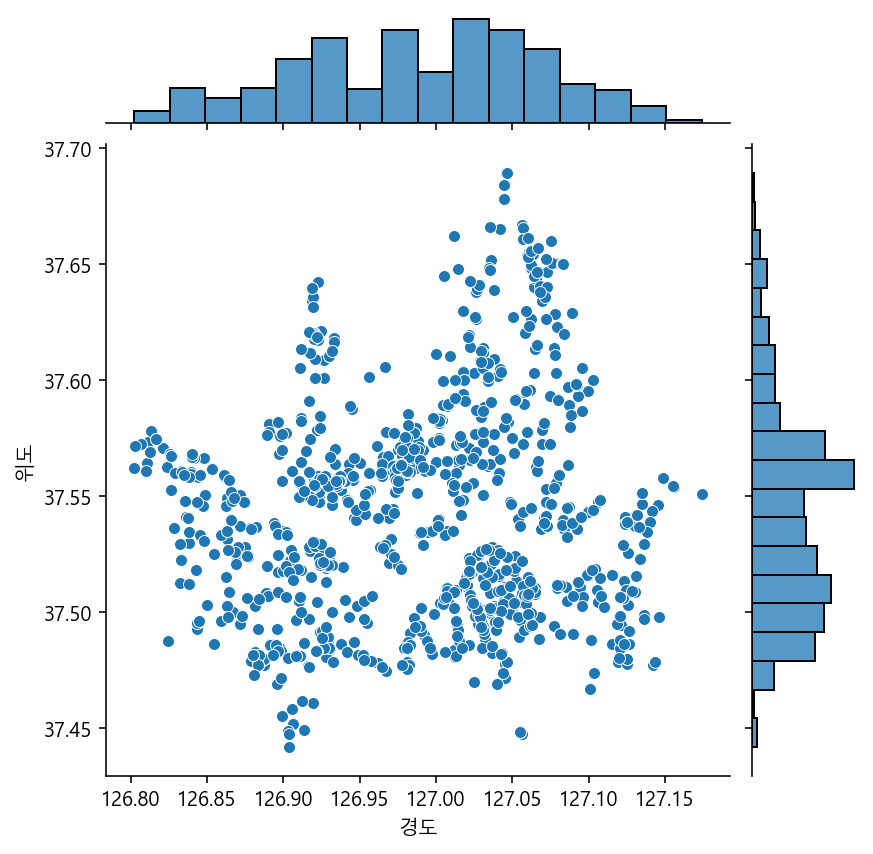

In [97]:
#jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도")

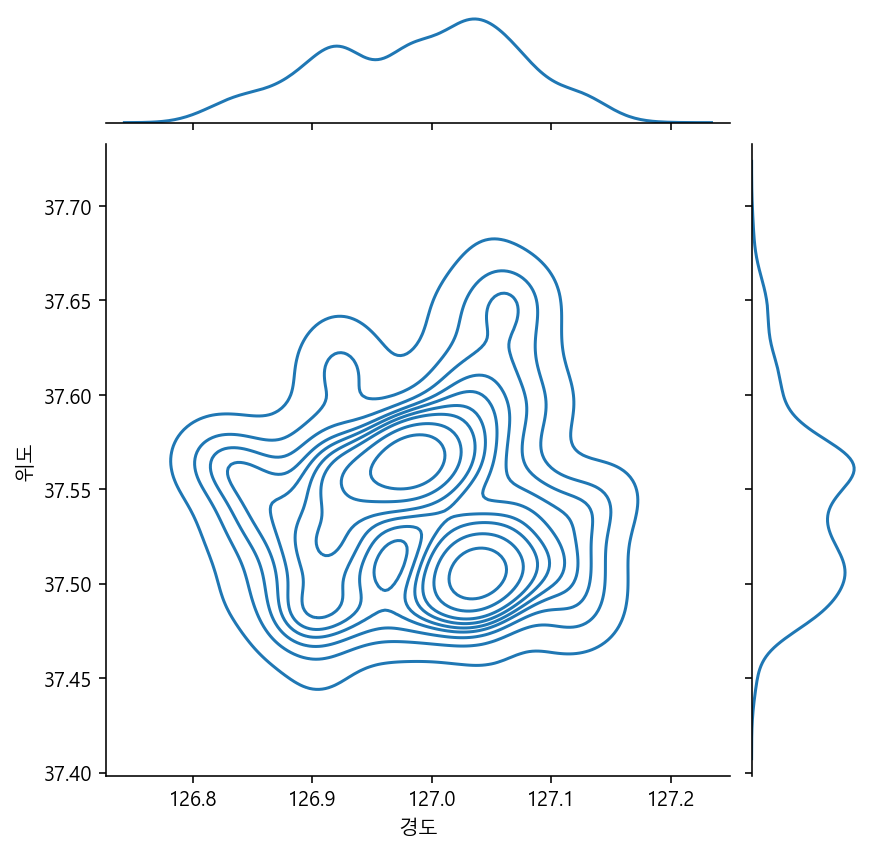

In [96]:
#jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

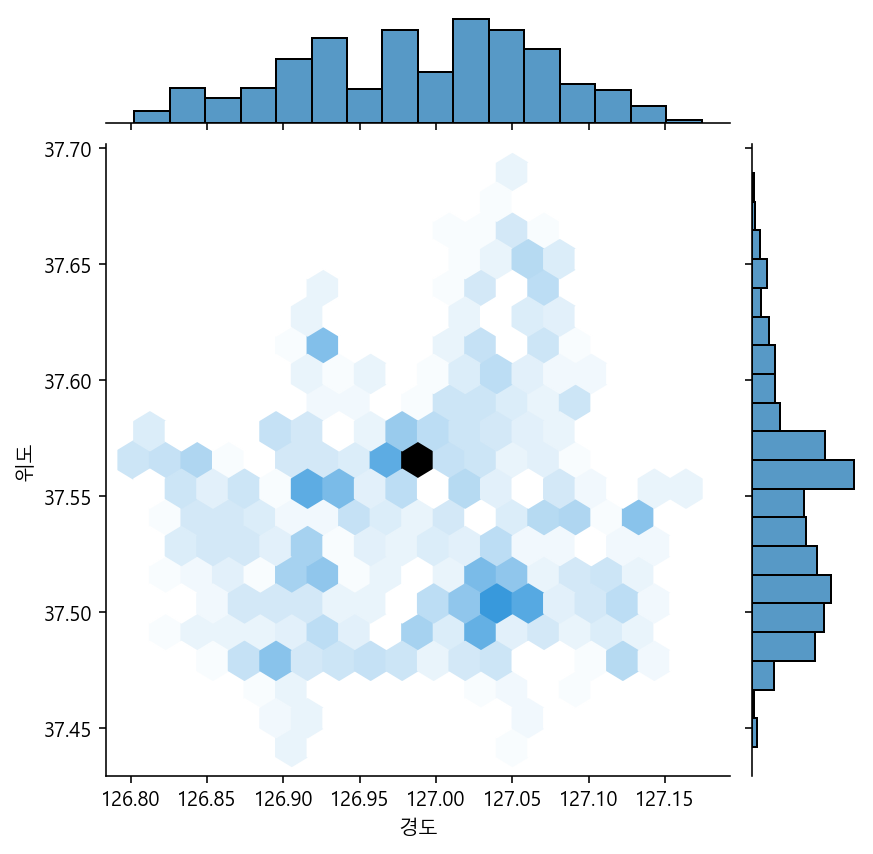

In [98]:
#jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="hex")

## 구별 브랜드 점포수

### groupby와 pivot_table로 구별 스타벅스, 이디야 매장 수 구하기`

#### groupby로 구별 매장 수 구하기

In [107]:
# 구별로 브랜드 점포수 구하기
# groupby를 사용하면 구별로 그룹화 하여 점포수를 구할 수 있음
# 그룹화 결과는 df_c_vs 변수에 담아서 재사용

# groupby로 구할 경우, 데이터를 시리즈 형태로 제공. 그래서 속도가 좀 더 빠름
# to_frame()이나 reset_index()를 통해 테이블 형태로 변경 가능.
df_c_vs=df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count().copy()
df_c_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [112]:
#reset_index로 인덱스를 컬럼으로 변경
df_c_vs.to_frame().head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [114]:
#reset_index로 인덱스를 컬럼으로 변경
df_c_vs=df_c_vs.reset_index().head()
df_c_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [116]:
# groupby "시군구명", "브랜드명"으로 갯수 세기
# 결과에 대한 데이터프레임 컬럼명을 ["구", "브랜드명", "매장수"]로 지정

df_c_vs.columns=["구", "브랜드명", "매장수"]
df_c_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


#### pivot_table로 구별 매장 수 구하기

In [120]:
# 위와 동일한 결과를 pivot_table로 나타내기
# pivot_table은 데이터를 기본적으로 테이블 형태로 제공.
# groupby 보다 직관적
pivot=pd.pivot_table(data=df_cafe, index=["시군구명", "브랜드명"], values="상호명", 
              aggfunc="count")
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [121]:
# 특정 구 데이터만 가져오기
pivot.loc["강남구"]

,상호명
브랜드명,
스타벅스,84
이디야,50
